In [2]:
# ----------------------------------------------------------------------------
#
# TITLE - galactic_plane.ipynb
# AUTHOR - James Lane
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Analyze the power spectra of the radio observations
'''

__author__ = "James Lane"

In [3]:
### Imports

## Basic
import numpy as np
import sys, os, ipdb

## Plotting
from matplotlib import pyplot as plt

## Scipy
import scipy.stats

In [4]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [15]:
directory = './data_place/'

data_filenames = ['sun1',
                  'sun2',
                  'sun3',
                  'sun_H1']

n_data_files = len(data_filenames)

In [16]:
bg1_freqs, bg1_power = np.load( directory+data_filenames[0]+'_power_freqs.npy' )
# bg2_freqs, bg2_power = np.load( directory+background_filenames[1]+'_power_freqs.npy' )
# bg3_freqs, bg3_power = np.load( directory+background_filenames[2]+'_power_freqs.npy' )
# bg4_freqs, bg4_power = np.load( directory+background_filenames[3]+'_power_freqs.npy' )

len_data = len(bg1_freqs)

/Users/JamesLane/Software/Python/anaconda3/lib/python3.6/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/Users/JamesLane/Software/Python/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


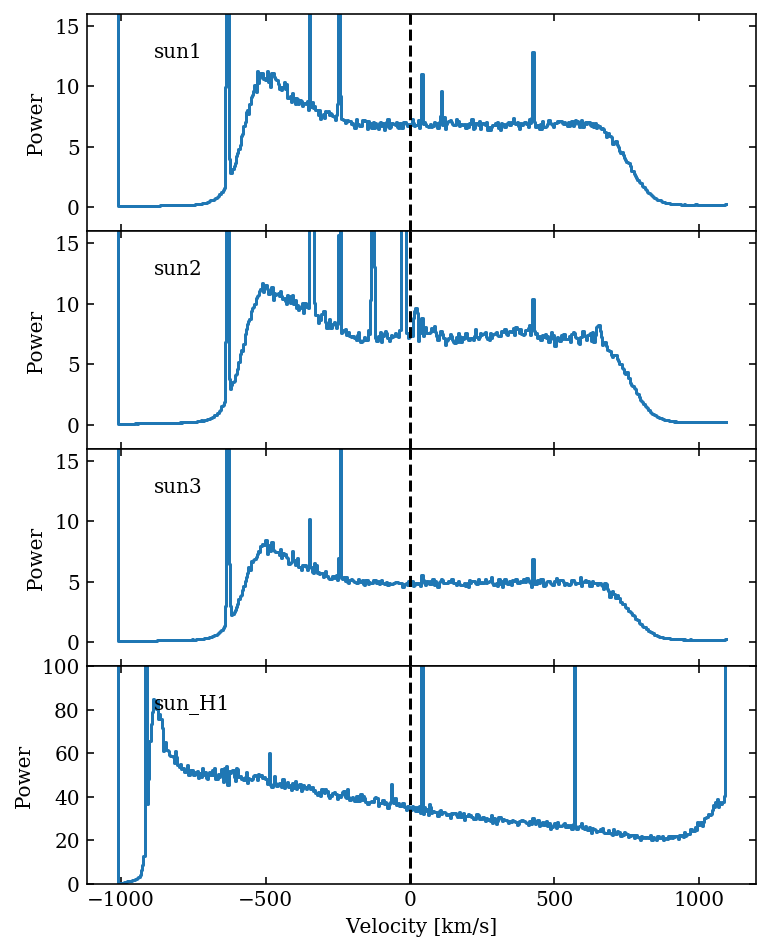

In [22]:
fig = plt.figure( figsize=(6,8) )
axs = fig.subplots( nrows=n_data_files, ncols=1 )

for i in range( n_data_files ):
    
    freqs, power = np.load( directory+data_filenames[i]+'_power_freqs.npy' )
    # power -= bg1_power
    
    # Convert the background to velocity, offset from 1420 MHz. Units of km/s
    velocity = 3.0E8 * ( ( 1.42E9 - freqs ) / ( 1.42E9 ) ) / 1000 
    velocity += 40
    bin_power, bin_edges, _ = scipy.stats.binned_statistic( velocity, power, 
                                                            bins=int(len_data/1000) )
    new_data_len = len(bin_power)
    bin_cents = ( bin_edges[1:] + bin_edges[:-1] ) / 2
    
    # axs[i].scatter( bin_cents, bin_power , marker='.', s=0.5 )
    axs[i].step( bin_cents, 
                 bin_power, 
                 where='mid' )
    axs[i].tick_params(labelbottom='off')
    axs[i].set_ylim(-2,16)
    if i == 3:
        axs[i].set_ylim(0,100)
    axs[i].set_ylabel('Power')
    axs[i].axvline( 0, linestyle='dashed', color='Black' )
    axs[i].annotate( data_filenames[i], xy=(0.1,0.8), xycoords='axes fraction' )
###i
    
axs[-1].set_xlabel('Velocity [km/s]')
axs[-1].tick_params(labelbottom='on')
fig.subplots_adjust(hspace=0)
plt.show()
pass;

In [ ]:
sun_filenames = [    'background_1',
                     'background_2',
                     'background_3',
                     'background_4']